In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [19]:
from helpers import load_data

# load dataset
x, y = load_data()

In [22]:
y

array([  8.95549970e-02,  -1.28027608e+00,   1.28930361e+00,
        -2.68157012e-01,  -2.06807030e-01,   5.38669461e-01,
        -4.84226326e-01,  -1.05814170e+00,   2.22695473e-01,
         1.94693837e-01,   4.37144573e-01,  -3.01041920e-01,
         4.25144932e-01,   3.76102400e-02,   8.33364051e-01,
        -4.37345163e-01,  -1.41108000e-04,  -3.08575746e-01,
         7.22554859e-01,  -3.72595292e-01,  -7.37222919e-01,
         9.51211821e-01,   6.05998553e-01,   3.59152612e-01,
         7.77071848e-01,   3.88647453e-01,  -5.59911457e-01,
        -5.68519390e-01,  -1.29168955e+00,   9.94909022e-01,
         7.00138842e-01,   7.27781486e-01,   7.73288841e-01,
        -7.46011639e-01,  -1.33397556e+00,  -1.50508406e-01,
         2.52524512e-01,  -9.56348655e-01,  -1.30763072e+00,
        -8.26518932e-01,   6.67509379e-01,  -5.72305352e-01,
         7.69121860e-02,   7.39727694e-01,  -1.06662741e+00,
         3.05224230e-02,  -7.66467434e-01,  -8.35127298e-01,
         1.21879684e-01,

In [20]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [ ]:
y

In [50]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_group_x = x[k_indices[k]]
    test_group_y = y[k_indices[k]]
    train_group_x = np.delete(x,k_indices[k])
    train_group_y = np.delete(y,k_indices[k])
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    test_group_x_poly = build_poly(test_group_x,degree)
    train_group_x_poly = build_poly(train_group_x,degree)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w_train = ridge_regression(train_group_y,train_group_x_poly,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = np.sqrt(2*compute_mse(train_group_y,train_group_x_poly,w_train))
    loss_te = np.sqrt(2*compute_mse(test_group_y,test_group_x_poly,w_train))
    return loss_tr, loss_te

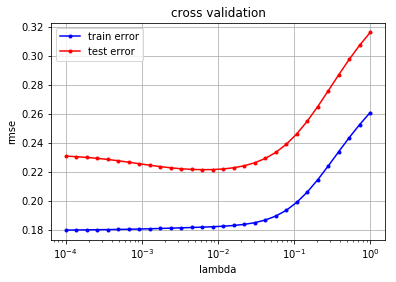

In [55]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    #best degree ever
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for l in lambdas:
        rmse_tr_var = 0
        rmse_te_var = 0
        for i in range(0,len(k_indices)-1):
            tmp = cross_validation(y, x, k_indices, i, l, degree)
            rmse_tr_var = rmse_tr_var + tmp[0]
            rmse_te_var = rmse_te_var + tmp[1]
        rmse_tr.append(rmse_tr_var/k_fold)
        rmse_te.append(rmse_te_var/k_fold)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

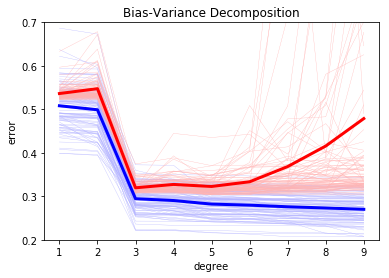

In [69]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_training,y_training,x_test,y_test = split_data(x, y, ratio_train, seed)
        for index_degrees, deg in enumerate(degrees):
            x_training_poly = build_poly(x_training,deg)
            x_test_poly = build_poly(x_test,deg)
            l_s_training = least_squares(y_training,x_training_poly)
            weights_training = l_s_training[0]
            rmse_tr[index_seed,index_degrees] = np.sqrt(2*compute_mse(y_training,x_training_poly,weights_training))
            rmse_te[index_seed,index_degrees] = np.sqrt(2*compute_mse(y_test,x_test_poly,weights_training))
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()